<a href="https://colab.research.google.com/github/doanane/-_-/blob/main/sentimental_analysis_for_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **loading data**

In [2]:
train=pd.read_csv('/content/sentiment_tweets3.csv')
print(f'Train data shape: {train.shape}')

train.head()

Train data shape: (10314, 3)


,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


# **EDA**

In [6]:
#check duplication
train.duplicated().sum()

0

In [8]:
# Missing values check
print(f'Missing values in train data:\n{train.isnull().sum()}')


Missing values in train data:
Index                        0
message to examine           0
label (depression result)    0
dtype: int64


**no duplicates data , no missing values!!**

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [10]:
train['label (depression result)'].value_counts()

,count
label (depression result),
0,8000
1,2314


<Axes: xlabel='label (depression result)'>

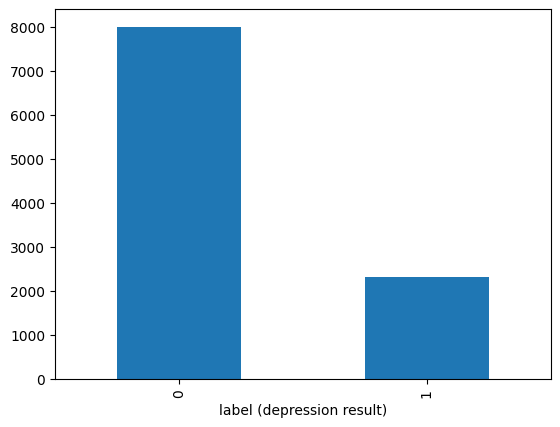

In [11]:
train['label (depression result)'].value_counts().plot(kind='bar')

In [12]:
#plot
import matplotlib.pyplot as plt
# NLP
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
import re

# Warning
import warnings
warnings.filterwarnings('ignore')

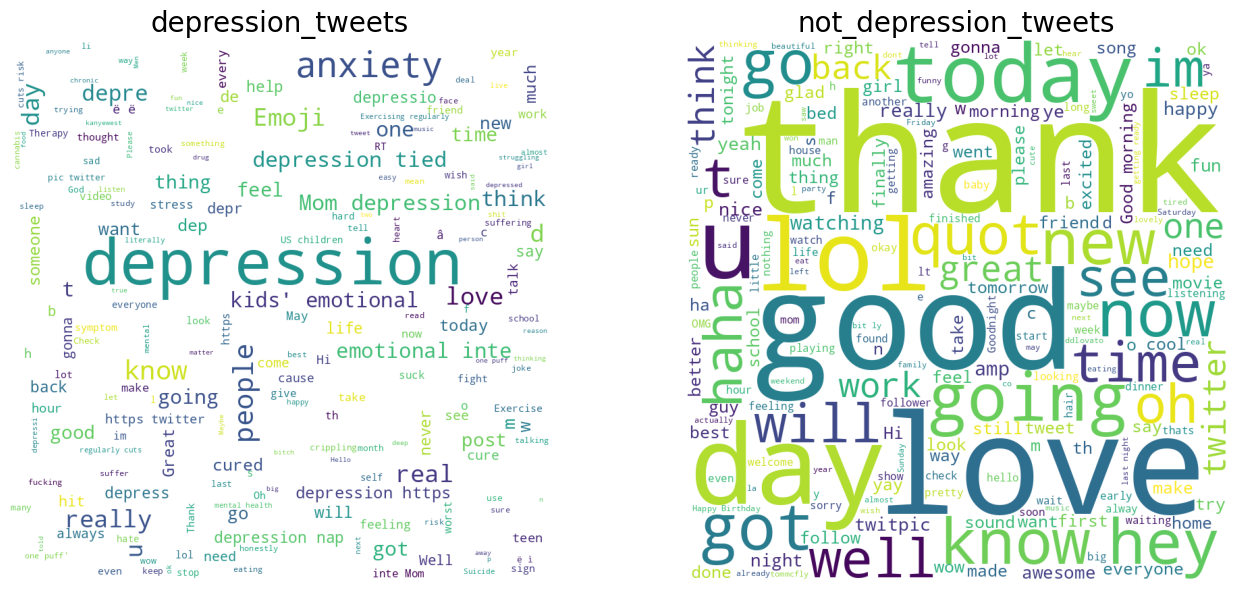

In [13]:
# Plotting wordclouds for both negative and positive tweets
stopwords = set(STOPWORDS)

# Removing 'user' word as it does not hold any importance in our context
stopwords.add('user')

depression_tweets = train['message to examine'][train['label (depression result)']==1].to_string()
wordcloud_depression = WordCloud(width = 800, height = 800,
                               background_color ='white', stopwords = stopwords,
                               min_font_size = 10).generate(depression_tweets)

not_depression_tweets = train['message to examine'][train['label (depression result)']==0].to_string()
wordcloud_not_depression = WordCloud(width = 800, height = 800,
                               background_color ='white', stopwords = stopwords,
                               min_font_size = 10).generate(not_depression_tweets)

# Plotting the WordCloud images
plt.figure(figsize=(14, 6), facecolor = None)

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_depression)
plt.axis("off")
plt.title('depression_tweets', fontdict={'fontsize': 20})

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_not_depression)
plt.axis("off")
plt.title('not_depression_tweets', fontdict={'fontsize': 20})

plt.tight_layout()
plt.show()

# **Data Preprocessing**

In [14]:
train['message_cleaned']=train['message to examine'].str.lower()
train.head()

,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need to send 'em to my accountant tomo...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace!!! myspace.com/lookthunder


**stop word**

In [15]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(words)

train['message_cleaned'] = train['message_cleaned'].apply(remove_stopwords)
train.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,"real good moment. missssssssss much,"
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga http://plurk.com/p/mzp1e
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need send 'em accountant tomorrow. odd...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace!!! myspace.com/lookthunder


In [16]:
#Cleaning URLs
def clean_url(data):
    data=re.sub(r"((https:|http|ftp)?(:\/\/)?(www\.)?)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&\/\/=]*)",' ',data)
    return re.sub(r'/', ' / ', data)
train['message_cleaned'] = train['message_cleaned'].apply(lambda x: clean_url(x))
train.head()

,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,"real good moment. missssssssss much,"
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need send 'em accountant tomorrow. odd...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace!!!


In [17]:
#Cleaning Punctuations
import string
def clean_punctuations(text):
    return text.translate(str.maketrans('', '', string.punctuation))
train['message_cleaned']= train['message_cleaned'].apply(lambda x: clean_punctuations(x))
train.head()


,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,real good moment missssssssss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace


In [18]:
#repeating_char
def clean_repeating_char(text):
    return re.sub(r"(.)\1\1+", r"\1\1", text)
train['message_cleaned'] = train['message_cleaned'].apply(lambda x: clean_repeating_char(x))
train.head()

,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace


In [19]:
#Cleaning Numbers
def clean_numbers(data):
    return re.sub('[0-9]+', '', data)
train['message_cleaned'] = train['message_cleaned'].apply(lambda x: clean_numbers(x))
train.head()

,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace


In [20]:
#remove_hashtag
def remove_hashtag(data):
    return re.sub('#[\w\d]+',' ' ,data)
train['message_cleaned'] = train['message_cleaned'].apply(lambda x: remove_hashtag(x))
train.head()

,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace


In [21]:
def clean_username(data):
    return re.sub('@[^\s]+',' ', data)
train['message_cleaned'] = train['message_cleaned'].apply(lambda x: clean_username(x))
train.head()


,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace


In [22]:
def clean_emoji(data):
    data = re.sub(r'<3', '<heart>', data)
    data = re.sub(r"[8:=;]['`\-]?[)d]+", '<smile>', data)
    data = re.sub(r"[8:=;]['`\-]?\(+", '<sad>', data)
    data = re.sub(r"[8:=;]['`\-]?[\/|l*]", '<neutral>', data)
    data = re.sub(r"[8:=;]['`\-]?p+", '<laugh>', data)
    return data
train['message_cleaned'] = train['message_cleaned'].apply(lambda x: clean_emoji(x))
train.head()

,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace


In [23]:
def remove_images(tweet):
    cleaned_tweet = re.sub(r"pic\.twitter\.com/\S+",'', tweet)
    cleaned_tweet = re.sub("\w+(\.png|\.jpg|\.gif|\.jpeg)", " ", cleaned_tweet)
    return cleaned_tweet

train["message_cleaned"] = train["message_cleaned"].apply(remove_images)
train.head(10)

,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace
5,624,so sleepy. good times tonight though,0,sleepy good times tonight though
6,701,"@SilkCharm re: #nbn as someone already said, d...",0,silkcharm re nbn someone already said fiber ho...
7,808,23 or 24ï¿½C possible today. Nice,0,ï¿½c possible today nice
8,1193,nite twitterville workout in the am -ciao,0,nite twitterville workout ciao
9,1324,"@daNanner Night, darlin'! Sweet dreams to you",0,dananner night darlin sweet dreams


In [24]:
train.head()

,Index,message to examine,label (depression result),message_cleaned
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace


In [25]:
pip install language_tool_python

In [26]:
#pip install spellchecker

In [27]:
import language_tool_python
#from spellchecker import SpellChecker
import nltk
from nltk.tokenize import word_tokenize

# Initialize the spell checker
#spell = SpellChecker()
tool = language_tool_python.LanguageTool('en-US')


INFO:language_tool_python.download_lt:Unzipping /tmp/tmprg1qvdfu.zip to /root/.cache/language_tool_python.
INFO:language_tool_python.download_lt:Downloaded https://www.languagetool.org/download/LanguageTool-6.4.zip to /root/.cache/language_tool_python.


In [28]:
train['corrected_tweets'] = train.apply(lambda l: tool.correct(l['message_cleaned']), axis=1)

In [29]:
train.head(10)

,Index,message to examine,label (depression result),message_cleaned,corrected_tweets
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much,Real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga,Reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen,Comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...,Lapcat need to send me accountant tomorrow odd...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace,Add MySpace
5,624,so sleepy. good times tonight though,0,sleepy good times tonight though,Sleepy good times tonight though
6,701,"@SilkCharm re: #nbn as someone already said, d...",0,silkcharm re nbn someone already said fiber ho...,Silkcharm re NBN someone already said fiber ho...
7,808,23 or 24ï¿½C possible today. Nice,0,ï¿½c possible today nice,Ï¿½c possible today nice
8,1193,nite twitterville workout in the am -ciao,0,nite twitterville workout ciao,Nite Waterville workout ciao
9,1324,"@daNanner Night, darlin'! Sweet dreams to you",0,dananner night darlin sweet dreams,Dananner night Darwin sweet dreams


In [30]:
train.isnull().sum()

,0
Index,0
message to examine,0
label (depression result),0
message_cleaned,0
corrected_tweets,0


In [31]:
train.shape

(10314, 5)

In [32]:
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

**Lemmatization**

In [33]:
nltk.download('punkt')
nltk.download('wordnet', '/root/nltk_data/')
!unzip /root/nltk_data/corpora/wordnet.zip -d /root/nltk_data/corpora/
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data/...


Archive:  /root/nltk_data/corpora/wordnet.zip
   creating: /root/nltk_data/corpora/wordnet/
  inflating: /root/nltk_data/corpora/wordnet/lexnames  
  inflating: /root/nltk_data/corpora/wordnet/data.verb  
  inflating: /root/nltk_data/corpora/wordnet/index.adv  
  inflating: /root/nltk_data/corpora/wordnet/adv.exc  
  inflating: /root/nltk_data/corpora/wordnet/index.verb  
  inflating: /root/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /root/nltk_data/corpora/wordnet/data.adj  
  inflating: /root/nltk_data/corpora/wordnet/index.adj  
  inflating: /root/nltk_data/corpora/wordnet/LICENSE  
  inflating: /root/nltk_data/corpora/wordnet/citation.bib  
  inflating: /root/nltk_data/corpora/wordnet/noun.exc  
  inflating: /root/nltk_data/corpora/wordnet/verb.exc  
  inflating: /root/nltk_data/corpora/wordnet/README  
  inflating: /root/nltk_data/corpora/wordnet/index.sense  
  inflating: /root/nltk_data/corpora/wordnet/data.noun  
  inflating: /root/nltk_data/corpora/wordnet/data.adv  


In [34]:
lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()

def lemmatizeRows(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

train['lemmatizedRows'] = train['corrected_tweets'].apply(lemmatizeRows)

train.head()

,Index,message to examine,label (depression result),message_cleaned,corrected_tweets,lemmatizedRows
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much,Real good moment miss much,Real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga,Reading manga,Reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen,Comeagainjen,Comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...,Lapcat need to send me accountant tomorrow odd...,Lapcat need to send me accountant tomorrow odd...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace,Add MySpace,Add MySpace


**stemming**

In [35]:
stemmer = PorterStemmer()

def stemRows(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

train['stemmedRows'] = train['lemmatizedRows'].apply(stemRows)

train.head()

,Index,message to examine,label (depression result),message_cleaned,corrected_tweets,lemmatizedRows,stemmedRows
0,106,just had a real good moment. i missssssssss hi...,0,real good moment miss much,Real good moment miss much,Real good moment miss much,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,reading manga,Reading manga,Reading manga,read manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen,Comeagainjen,Comeagainjen,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em accountant tomorrow oddly ...,Lapcat need to send me accountant tomorrow odd...,Lapcat need to send me accountant tomorrow odd...,lapcat need to send me account tomorrow oddli ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace,Add MySpace,Add MySpace,add myspac


**TF-IDF Vectorization**

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

Vectorizer = TfidfVectorizer()

dataVectorized = Vectorizer.fit_transform(train['corrected_tweets'])

dataVectorized.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
dataVectorized.toarray().shape


(10314, 18009)

**Splitting the data**

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train ,y_test = train_test_split(dataVectorized, train['label (depression result)'], test_size=0.2,
                                                    stratify= train['label (depression result)']  , random_state=0)

In [39]:
X_train.shape , X_test.shape ,y_train.shape ,y_test.shape

((8251, 18009), (2063, 18009), (8251,), (2063,))

In [40]:
from sklearn.utils import compute_class_weight

classWeights = compute_class_weight("balanced", classes = np.unique(train['label (depression result)']),
                                     y = train['label (depression result)'])

classWeights = dict(zip(np.unique(np.unique(train['label (depression result)'])), classWeights))

print(classWeights)

{0: 0.644625, 1: 2.228608470181504}


**Modelling**

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [42]:
lr = LogisticRegression(class_weight=classWeights, random_state=0)

nb = MultinomialNB()

dt = DecisionTreeClassifier(class_weight=classWeights, random_state=0)

rf = RandomForestClassifier(class_weight=classWeights, random_state=0)

#svc = LinearSVC(class_weight=classWeights, random_state=0)

In [43]:
lr.fit(X_train.toarray(), y_train)

nb.fit(X_train.toarray(), y_train)

dt.fit(X_train.toarray(), y_train)

rf.fit(X_train.toarray(), y_train)

#svc.fit(X_train.toarray(), y_train)

RandomForestClassifier(class_weight={0: 0.644625, 1: 2.228608470181504},
                       random_state=0)

In [44]:
lrScore = lr.score(X_train.toarray(), y_train)

nbScore = nb.score(X_train.toarray(), y_train)

dtScore = dt.score(X_train.toarray(), y_train)

rfScore = rf.score(X_train.toarray(), y_train)

In [45]:
colors = plt.cm.viridis(np.linspace(0, 1, 4))

models = ["Logistic Regression","Naive Bayes","Decision Trees", "Random Forests"]

Logistic Regression Train Accuracy score is : 99.75%

Naive Bayes Train Accuracy score is : 94.15%

Decision Tree Train Accuracy score is : 99.98%

Random Forest Train Accuracy score is : 99.98%


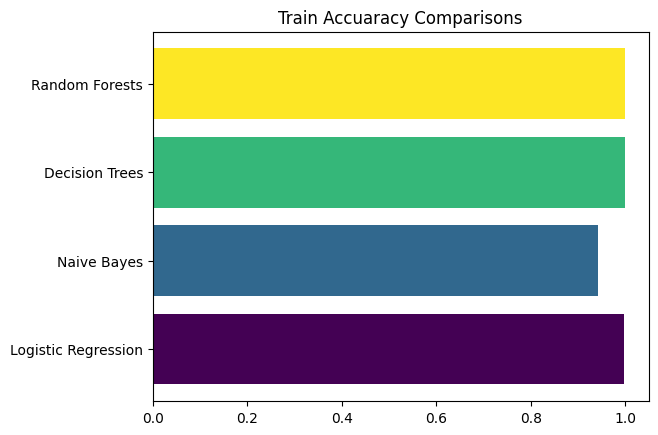

In [46]:
plt.barh(models, width = [lrScore, nbScore, dtScore, rfScore],
        color = colors)

plt.title("Train Accuaracy Comparisons")

print(f'Logistic Regression Train Accuracy score is : {round(lrScore * 100 ,2)}%')

print(f'\nNaive Bayes Train Accuracy score is : {round(nbScore * 100 , 2)}%')

print(f'\nDecision Tree Train Accuracy score is : {round(dtScore * 100 , 2)}%')

print(f'\nRandom Forest Train Accuracy score is : {round(rfScore * 100 , 2)}%')

In [47]:
lrScore = lr.score(X_test.toarray(), y_test)

nbScore = nb.score(X_test.toarray(), y_test)

dtScore = dt.score(X_test.toarray(), y_test)

rfScore = rf.score(X_test.toarray(), y_test)


Logistic Regression Test Accuracy score is : 99.32%

Naive Bayes Test Accuracy score is : 91.71%

Decision Tree Test Accuracy score is : 94.04%

Random Forest Test Accuracy score is : 94.81%


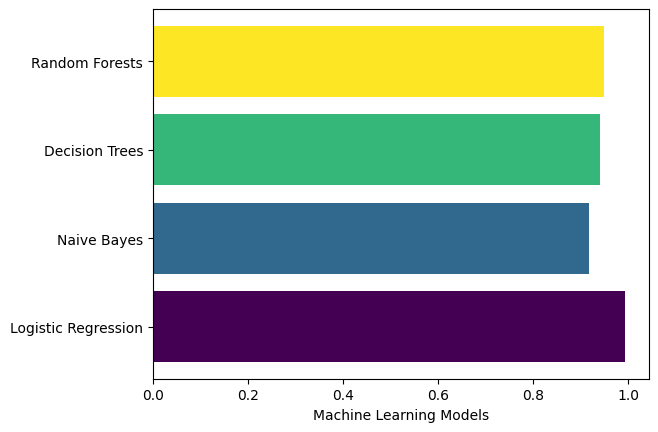

In [48]:
plt.barh(models, width = [lrScore, nbScore, dtScore, rfScore],
        color = colors)

plt.xlabel("Machine Learning Models")


print(f'Logistic Regression Test Accuracy score is : {round(lrScore * 100 ,2)}%')

print(f'\nNaive Bayes Test Accuracy score is : {round(nbScore * 100 , 2)}%')

print(f'\nDecision Tree Test Accuracy score is : {round(dtScore * 100 , 2)}%')

print(f'\nRandom Forest Test Accuracy score is : {round(rfScore * 100 , 2)}%')

**Evaluating Models**

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

In [50]:
lrPreds = lr.predict(X_test.toarray())

nbPreds = nb.predict(X_test.toarray())

dtPreds = dt.predict(X_test.toarray())

rfPreds = rf.predict(X_test.toarray())

In [51]:
lrScore = roc_auc_score(lrPreds, y_test)

nbScore = roc_auc_score(nbPreds, y_test)

dtScore = roc_auc_score(dtPreds, y_test)

rfScore = roc_auc_score(rfPreds, y_test)

Logistic Regression Test Roc Auc Score is : 99.57%

Naive Bayes Test Roc Auc Score is : 94.88%

Decision Tree Test Roc Auc Score is : 89.57%

Random Forest Test Roc Auc Score is : 90.73%


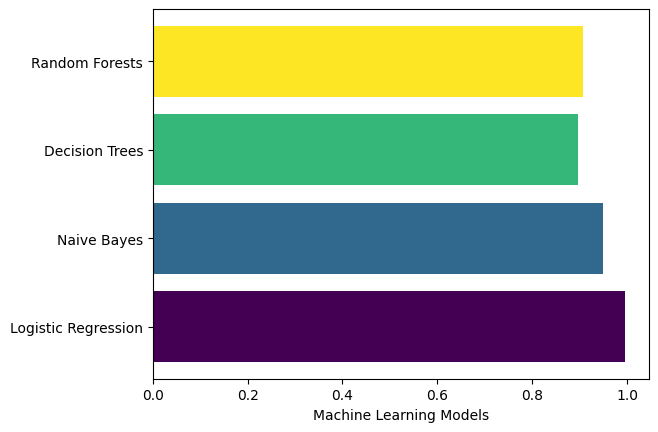

In [52]:
plt.barh(models, width = [lrScore, nbScore, dtScore, rfScore],
        color = colors)

plt.xlabel("Machine Learning Models")


print(f'Logistic Regression Test Roc Auc Score is : {round(lrScore * 100 ,2)}%')

print(f'\nNaive Bayes Test Roc Auc Score is : {round(nbScore * 100 , 2)}%')

print(f'\nDecision Tree Test Roc Auc Score is : {round(dtScore * 100 , 2)}%')

print(f'\nRandom Forest Test Roc Auc Score is : {round(rfScore * 100 , 2)}%')

In [53]:
def makeCM_Matrix(cm_matrix, title):

  categories = ['Negative','Positive']

  group_names = ['True Negative','False Positive', 'False Negative','True Positive']

  group_percentages = ['{0:.2%}'.format(value) for value in cm_matrix.flatten() / np.sum(cm_matrix)]

  labels = [f'{v1}\n{v2} ({v3})' for v1, v2 ,v3 in zip(group_names,cm_matrix.flatten(),group_percentages)]

  labels = np.asarray(labels).reshape(2,2)

  sns.heatmap(cm_matrix, annot = labels,fmt = '',
  xticklabels = categories, yticklabels = categories)

  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title (f"{title} Confusion Matrix", fontdict = {'size':18}, pad = 20)
  plt.show()

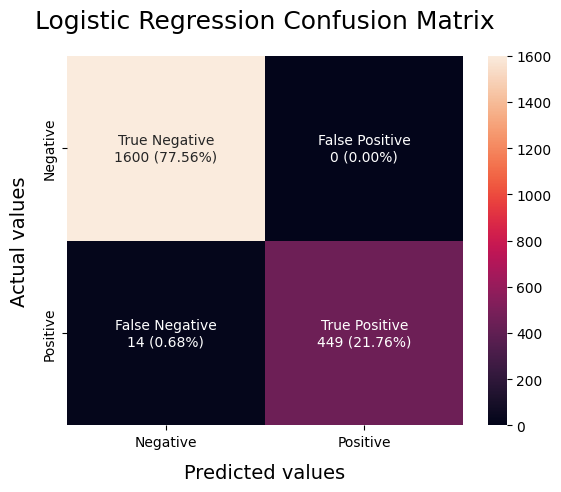

In [54]:
import seaborn as sns
makeCM_Matrix(confusion_matrix(y_test, lrPreds), 'Logistic Regression')

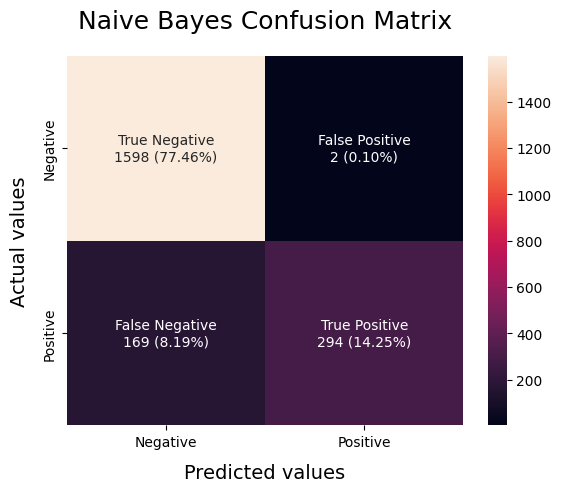

In [55]:
makeCM_Matrix(confusion_matrix(y_test, nbPreds), 'Naive Bayes')


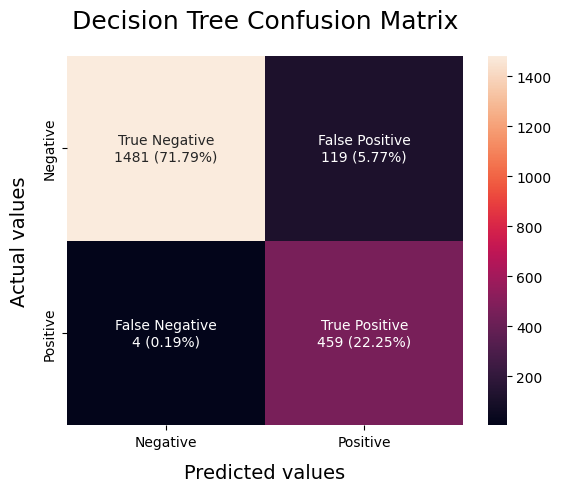

In [56]:
makeCM_Matrix(confusion_matrix(y_test, dtPreds), 'Decision Tree')


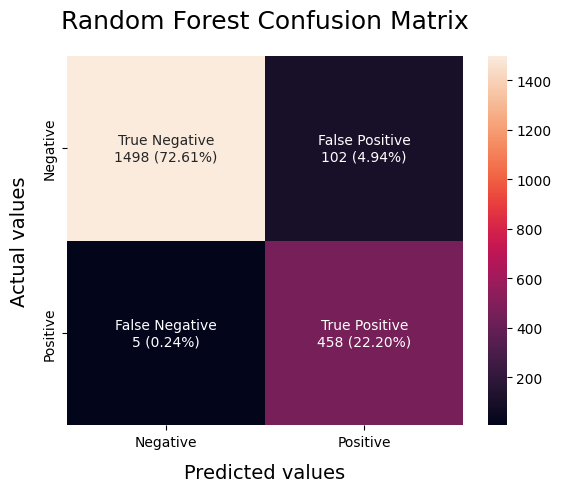

In [57]:
makeCM_Matrix(confusion_matrix(y_test, rfPreds), 'Random Forest')


In [58]:
from sklearn.metrics import classification_report

classification_report = classification_report(y_test, lrPreds, target_names=['No','Yes'])
print('Logistic Regression Classification Report: \n',classification_report)

Logistic Regression Classification Report: 
               precision    recall  f1-score   support

          No       0.99      1.00      1.00      1600
         Yes       1.00      0.97      0.98       463

    accuracy                           0.99      2063
   macro avg       1.00      0.98      0.99      2063
weighted avg       0.99      0.99      0.99      2063



In [59]:
from sklearn.metrics import classification_report

classification_report = classification_report(y_test, nbPreds, target_names=['No','Yes'])
print('Naive Bayes Classification Report: \n', classification_report)

Naive Bayes Classification Report: 
               precision    recall  f1-score   support

          No       0.90      1.00      0.95      1600
         Yes       0.99      0.63      0.77       463

    accuracy                           0.92      2063
   macro avg       0.95      0.82      0.86      2063
weighted avg       0.92      0.92      0.91      2063



In [60]:
from sklearn.metrics import classification_report

classification_report = classification_report(y_test, dtPreds, target_names=['No','Yes'])
print('Decision Tree Classification Report: \n',classification_report)

Decision Tree Classification Report: 
               precision    recall  f1-score   support

          No       1.00      0.93      0.96      1600
         Yes       0.79      0.99      0.88       463

    accuracy                           0.94      2063
   macro avg       0.90      0.96      0.92      2063
weighted avg       0.95      0.94      0.94      2063



In [61]:
from sklearn.metrics import classification_report

classification_report = classification_report(y_test, rfPreds, target_names=['No','Yes'])
print('Random Forest Classification Report: \n',classification_report)

Random Forest Classification Report: 
               precision    recall  f1-score   support

          No       1.00      0.94      0.97      1600
         Yes       0.82      0.99      0.90       463

    accuracy                           0.95      2063
   macro avg       0.91      0.96      0.93      2063
weighted avg       0.96      0.95      0.95      2063

